In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder_path = '/content/drive/My Drive/EA_datathon_2020/'
files = ['data_game_launch.csv','data_entitlements.csv','data_session.csv',
         'data_sub.csv','data_games.csv','data_oa_vault.csv',
         'all_trial_users_all_sessions.csv','trial_users_features.csv']

In [0]:
data_game_launch_df = pd.read_csv(folder_path+files[0])
data_entitlements_df = pd.read_csv(folder_path+files[1])
data_session_df = pd.read_csv(folder_path+files[2])
data_sub_df = pd.read_csv(folder_path+files[3])
data_games_df = pd.read_csv(folder_path+files[4])
data_oa_vault_df = pd.read_csv(folder_path+files[5])


In [0]:
all_trial_users_all_sessions_df = pd.read_csv(folder_path+files[6])
trial_users_features_df = pd.read_csv(folder_path+files[7])

In [0]:
# data_game_launch_df.head(5)

In [0]:
# data_sub_df.head(5)

In [0]:
# data_sub_df.groupby(['subscription_type']).count()

In [0]:
# data_sub_df.groupby(['user_id']).count()

In [0]:
data_sub_df2=data_sub_df.drop(columns=['subs_start_date','subs_end_date'])

In [0]:
sub_grouped_df=data_sub_df2.groupby(['user_id']).count().rename(columns={'subscription_type' : 'sub_count'})

In [0]:
sub_grouped_df.head(5)

,sub_count
user_id,
00012443acd80d07693e1269d8854d56e2d50171,1
00014b53a654ad0a6eaa0cc43ce0c03de90356f5,1
0007108253314fd345c4cf4f8f9ac0f54396e3b2,1
001100ca786d7dc9c02a21f3aa0882bafb663bce,1
001dab7f79dc859b6d07af3a3cb6508a995474bd,2


In [0]:
all_trial_users_all_sessions_df.head(5)

,user_id,subs_start_date,subs_end_date,session_date,game_title
0,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-31,BATTLEFIELD 4
1,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-28,BATTLEFIELD 4
2,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-27,BATTLEFIELD HARDLINE
3,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2017-01-04,BATTLEFIELD 4
4,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-28,BATTLEFIELD HARDLINE


In [0]:
joined_df=pd.merge(sub_grouped_df, all_trial_users_all_sessions_df, how='inner',on=['user_id'])

In [0]:
joined_df.head(5)

,user_id,sub_count,subs_start_date,subs_end_date,session_date,game_title
0,001dab7f79dc859b6d07af3a3cb6508a995474bd,2,2017-02-18,2017-02-25,2017-08-25,CRYSIS 3
1,001dab7f79dc859b6d07af3a3cb6508a995474bd,2,2017-02-18,2017-02-25,2017-08-25,CRYSIS 3
2,001dab7f79dc859b6d07af3a3cb6508a995474bd,2,2017-02-18,2017-02-25,2017-08-25,CRYSIS 3
3,001dab7f79dc859b6d07af3a3cb6508a995474bd,2,2017-02-18,2017-02-25,2017-02-21,DRAGON AGE: INQUISITION
4,0062dd3ba05a931f6e765e1945f9a46fe6aafd14,1,2017-02-23,2017-03-06,2017-03-02,SIMCITY (2013)


In [0]:
joined_df.drop_duplicates(subset=['user_id']).groupby(['sub_count']).count()

,user_id,subs_start_date,subs_end_date,session_date,game_title
sub_count,,,,,
1,416,416,416,416,416
2,603,603,603,603,603
3,239,239,239,239,239
4,81,81,81,81,81
5,36,36,36,34,34
6,10,10,10,10,10
7,13,13,13,13,13
8,2,2,2,2,2
9,1,1,1,1,1


In [0]:
## drop subscription_type and platform ('ORIGIN SUB 7 DAY TRIAL', 'PC') since all are the same
all_trial_users_all_sessions_df = all_trial_users_all_sessions_df.drop(['subscription_type','platform','game_title_vault','country'],axis=1)


,user_id,subs_start_date,subs_end_date,session_date,game_title
0,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-31,BATTLEFIELD 4
1,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-28,BATTLEFIELD 4
2,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-27,BATTLEFIELD HARDLINE
3,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2017-01-04,BATTLEFIELD 4
4,ff887547b8553085efb4f9d3b97223354ea29b1c,2017-03-06,2017-03-13,2016-12-28,BATTLEFIELD HARDLINE


In [0]:
all_trial_users_all_sessions_df.groupby(['user_id'])

In [0]:
# all_trial_users_all_sessions_df[all_trial_users_all_sessions_df['game_title']=='FIFA 18']

In [0]:
### encode relevant features
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
pd.get_dummies(df, prefix=['col1', 'col2']).head()

In [0]:
all_trial_users_all_sessions_df[all_trial_users_all_sessions_df['']]

In [0]:
all_trial_users_all_sessions_df.groupby(['user_id',]

In [0]:
grouped_df = all_trial_users_all_sessions_df.groupby(['user_id','subs_start_date','subs_end_date']).count().sort_values('session_date',ascending=True)

In [0]:
### find number of sessions
grouped_df.quantile(q=[0.25,0.5,.75])

,session_date,game_title,game_title_vault,country
0.25,4.0,4.0,4.0,4.0
0.50,11.0,11.0,11.0,11.0
0.75,35.0,35.0,35.0,35.0


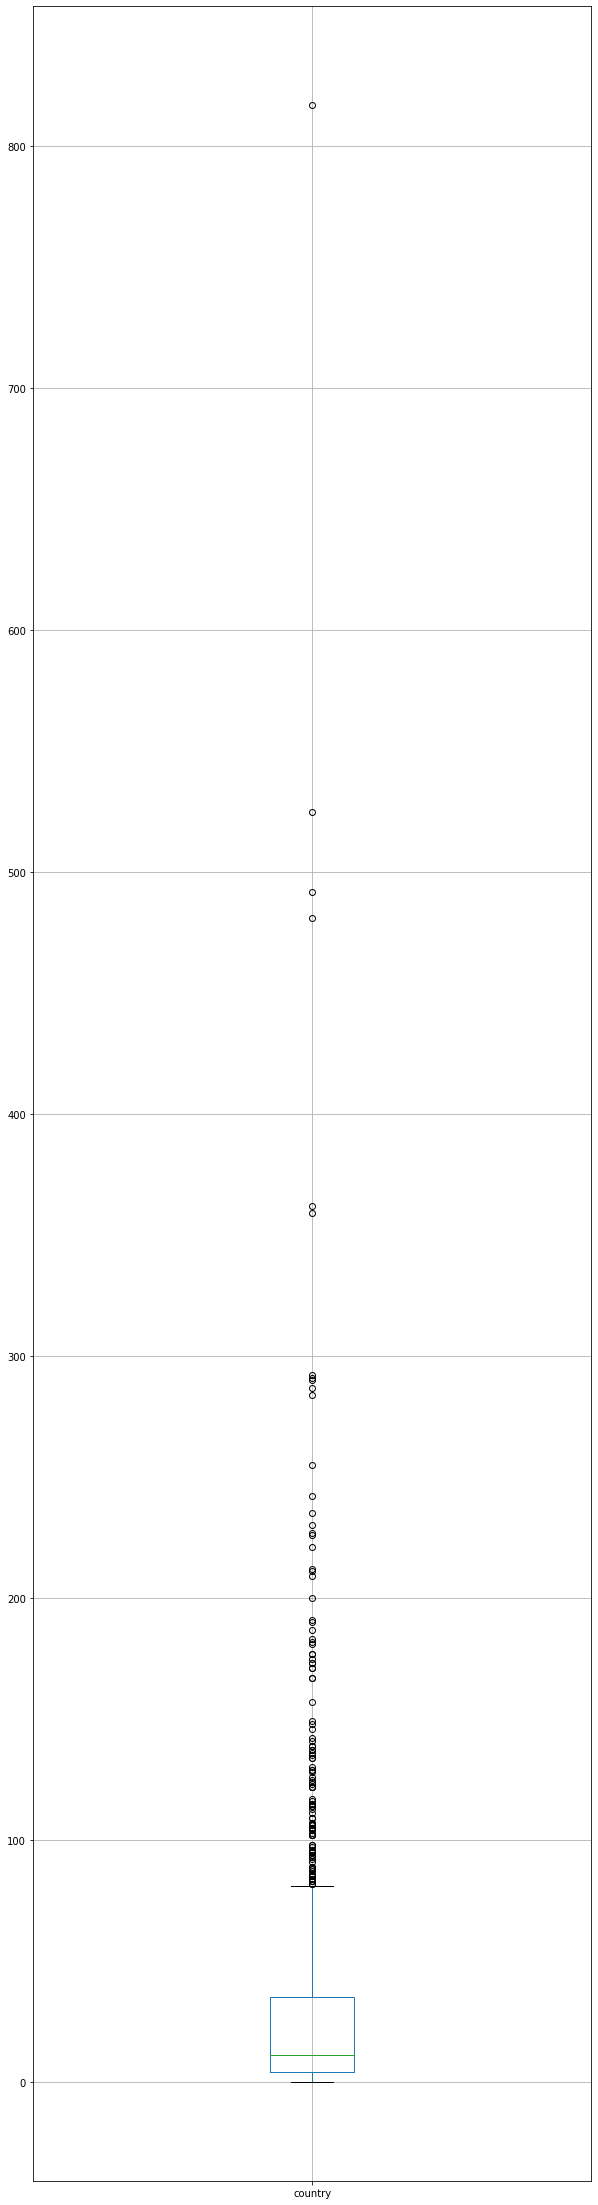

In [0]:
# grouped_df[grouped_df['country']<=1].count()
# grouped_df[grouped_df['country']==2].count()
# grouped_df[grouped_df['country']>3].count()
grouped_df.boxplot(column='country',figsize=(10,40))

In [0]:
all_trial_users_all_sessions_df.groupby(['game_title_vault']).count().sort_values('user_id',ascending=False).head(20)

KeyError: ignored

In [0]:
grouped_df.groupby(['game_title_vault']).count().sort_values('session_date',ascending=False).head(20).columns

Index(['session_date', 'game_title', 'country'], dtype='object')

In [0]:
all_trial_users_all_sessions_df.loc[all_trial_users_all_sessions_df['user_id']=='ffed27188ad5548d7a66fabe7f8c0f595182f301']

,user_id,subscription_type,subs_start_date,subs_end_date,session_date,game_title,game_title_vault,platform,country
20064,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-07-16,C&C RED ALERT 3,C&C THE ULTIMATE COLLECTION,PC,DE
20065,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2016-08-22,BATTLEFIELD 4,BATTLEFIELD 4,PC,DE
20066,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-07-28,SIMS 4,SIMS 4,PC,DE
20067,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-09-07,C&C RED ALERT 3,C&C THE ULTIMATE COLLECTION,PC,DE
20068,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-07-03,BATTLEFIELD HARDLINE,BATTLEFIELD HARDLINE,PC,DE
...,...,...,...,...,...,...,...,...,...
20350,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2016-12-22,NFS 2016,NFS 2016,PC,DE
20351,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-08-25,BATTLEFIELD 4,BATTLEFIELD 4,PC,DE
20352,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2018-05-04,BATTLEFIELD HARDLINE,BATTLEFIELD HARDLINE,PC,DE
20353,ffed27188ad5548d7a66fabe7f8c0f595182f301,ORIGIN SUB 7 DAY TRIAL,2016-07-16,2016-07-18,2017-01-08,PLANTS VS ZOMBIES GARDEN WARFARE 2,PLANTS VS ZOMBIES GARDEN WARFARE 2,PC,DE
